# CartPole-v0-v1

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
 

Pendulum starts upright, goal is to prevent it from falling over by controlling the cart's velocity.

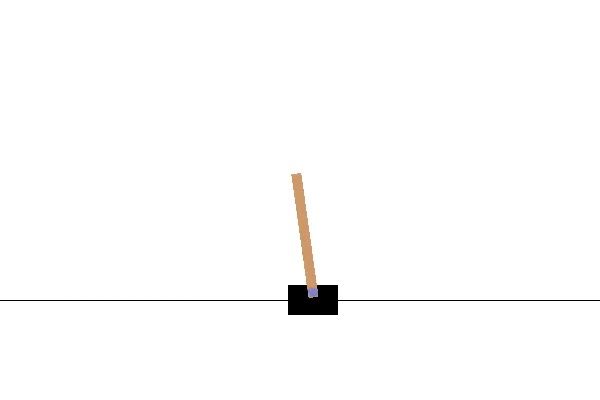

**Environment variables:** 

**Observation**

    ### Action Space
    The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction of the fixed force the cart is pushed with.
    | Num | Action                 |
    |-----|------------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |

    ### Observation Space
    The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:
    | Num | Observation           | Min                  | Max                |
    |-----|-----------------------|----------------------|--------------------|
    | 0   | Cart Position         | -4.8                 | 4.8                |
    | 1   | Cart Velocity         | -Inf                 | Inf                |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°)  | ~ 0.418 rad (24°)  |
    | 3   | Pole Angular Velocity | -Inf                 | Inf                |


**Reward**: +1 for every step taken​

Starting state: All observations are assigned a uniform​
random value between ±0.05​

**Episode Termination:**

Pole Angle is more than 12 degree

Cart Position is more than 24

Episode length is greater than 500

# Fixing dependencies in because of version imcompatabilities between tensorflow and gym. 

In [1]:
# # !pip install keras
# !pip install keras-rl2

## Importing Gym OpenAI

In [2]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [3]:
from keras import backend

In [4]:
import gym 
import random
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt 
import numpy as np
# import keras.backend as K


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Dense, Activation, Flatten, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

### Here we implement the brute force/Random action sampling as baseline

## Make the environment here

In [51]:
env = gym.make('CartPole-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n

#### No. of Actions Available are:

Left or right on a 1-D Axis, as in, where to move the cart in order to balance the pole.

In [52]:
actions

2

### Baseline Implementation with random action sampling

Episode:1 Score:15.0
Episode:2 Score:22.0
Episode:3 Score:21.0
Episode:4 Score:12.0
Episode:5 Score:11.0
Episode:6 Score:32.0
Episode:7 Score:9.0
Episode:8 Score:19.0
Episode:9 Score:32.0
Episode:10 Score:10.0
Episode:11 Score:12.0
Episode:12 Score:9.0
Episode:13 Score:22.0
Episode:14 Score:18.0
Episode:15 Score:18.0
Episode:16 Score:18.0
Episode:17 Score:47.0
Episode:18 Score:23.0
Episode:19 Score:8.0
Episode:20 Score:25.0
Episode:21 Score:18.0
Episode:22 Score:31.0
Episode:23 Score:21.0
Episode:24 Score:24.0
Episode:25 Score:17.0
Episode:26 Score:20.0
Episode:27 Score:13.0
Episode:28 Score:41.0
Episode:29 Score:15.0
Episode:30 Score:26.0
Episode:31 Score:34.0
Episode:32 Score:46.0
Episode:33 Score:27.0
Episode:34 Score:48.0
Episode:35 Score:52.0
Episode:36 Score:18.0
Episode:37 Score:35.0
Episode:38 Score:19.0
Episode:39 Score:17.0
Episode:40 Score:10.0
Episode:41 Score:13.0
Episode:42 Score:42.0
Episode:43 Score:38.0
Episode:44 Score:15.0
Episode:45 Score:12.0
Episode:46 Score:11.0


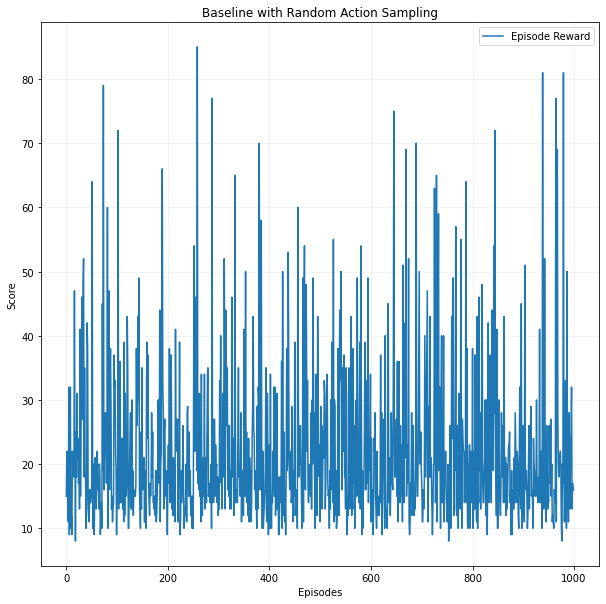

In [53]:
episodes = 1000

# episode_list = []
score_list = []

for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
#         env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward       
    print('Episode:{} Score:{}'.format(episode, score))
    score_list.append(score)
    
fig = plt.figure(figsize=(10,10))
plt.plot(range(episodes), score_list, label="Episode Reward")
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('Baseline with Random Action Sampling')
plt.grid(alpha=0.2)
plt.legend()

# Deep Q-Learning 

Uses neural networks to approximate Q-value functions. The state is given as input and Q-value of all possible. By maintaining the memory of the experiences, and an initial policy π.

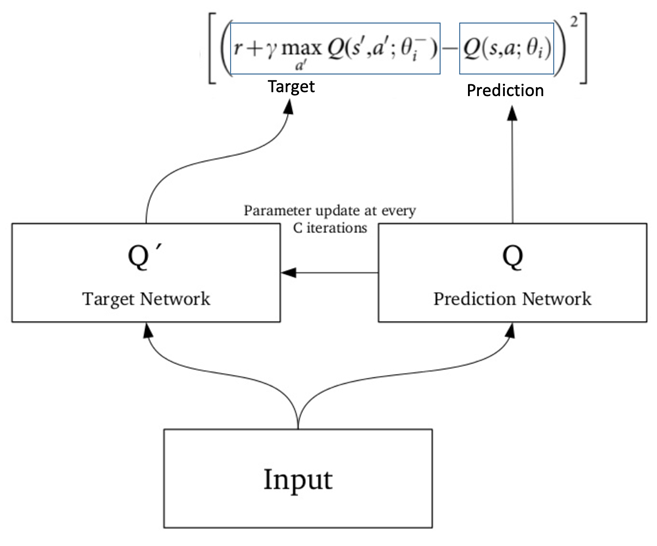


DQN leverages experience replay as a stabilization mechanism. Experience replay collects a buffer of historical transition models and randomly inserts the transition values during the Q-update function because we want to replicate the Temporal Difference target operation using our neural network rather than using a Q-table

### We Build our model here 

#### The first layer has to be flattened in the shape of (1,states)
#### While the last layer has to be of the shape of action.

In [117]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model
    model.add(Dense(actions, activation='linear'))
    return model

In [118]:
model = build_model(states, actions)

### The summary of the model.

In [119]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_12 (Dense)            (None, 24)                120       
                                                                 
 dense_13 (Dense)            (None, 24)                600       
                                                                 
 dense_14 (Dense)            (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


# Our Idea.

Our idea was the to implement Standard Error from Hessian Matrix, which has very often been used in Optimization problems outside of Reinforcement Learning. The problem is, the only way a derivative can be taken of y_pred w.r.t y_true is when there is decipherable function that **Gradient Tape** understands. 

$y_{pred}=f(y_{true})$

But there is no relation between $y_{pred}$ & $y_{true}$, however, the idea then was. 

$ys=model(env)$

But, this doesn't seem to work either. 
This is how we ended up on the idea.

In [ ]:
x = tf.random.normal([7, 5])
layer1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)

with tf.GradientTape() as t2:
  with tf.GradientTape() as t1:
    x = layer1(x)
    x = layer2(x)
    loss = tf.reduce_mean(x**2)

  g = t1.gradient(loss, layer1.kernel)

h = t2.jacobian(g, layer1.kernel)
print(h)

### However when there is not an existing function behind it

In [ ]:
x = tf.constant(4.0)

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.convert_to_tensor(tf.Variable(16.0), dtype=tf.float32)
#     print(z)
#     z = tf.multiply(y,y)
#     print(z)
dz_dx = t.gradient(z,x)
print("The derivative is",dz_dx)

## This was the idea of our function of custom Standard Error from Hessian

In [ ]:
import tensorflow as tf
tf.__version__

### this was another idea to accomplish the same. Doesn't work however.

In [ ]:
@tf.function
def process_diag(tensor):
    tensor = tf.squeeze(tensor, axis=[-1])
    diag = tf.matrix_diag_part(tensor)
    zeros = tf.zeros(tf.shape(tensor)[0:-1], dtype=tf.float32)
    tensor = tf.expand_dims(tf.linalg.set_diag(tensor, zeros, name=None), -1)
    return tensor, diag 

@tf.function
def hessian(y_true, y_pred):
#     y_pred = tf.Variable(tf.convert_to_tensor(y_pred))
    y_pred = tf.Variable(y_pred)
    y_true = tf.Variable(tf.cast(y_true, y_pred.dtype))
    y_loss = tf.subtract(y_true-y_pred)
    
    with tf.GradientTape() as t2:
        t2.watch(y_pred)
        with tf.GradientTape() as t1:
            t1.watch(y_pred)
        g = t1.gradient(y_loss,y_pred)
        hessian = t2.jacobian(g, y_pred)
#         hessian, diag = process_diag(#solve? linalg.eig? (-(hessian)))
#         likelihood = backend.sqrt(diag)
    
    return hessian
            


# Until we landed on this function this idea.

We define $y_{pred} = f(y_{pred},y_{true})$ with $f$ being $y_{pred}-y_{true}$

In [151]:
def hessian(y_true, y_pred):
    y_pred = tf.Variable(tf.convert_to_tensor(y_pred))
    y_true = tf.Variable(tf.cast(y_true, y_pred.dtype))
    with tf.GradientTape() as t2:
        t2.watch(y_true)
        with tf.GradientTape() as t1:
            t1.watch(y_true)
            #we use tf.subtract to construct our function
            y_loss = tf.subtract(y_pred, y_true)
            dy_dx = t1.gradient(y_loss, y_true)
        d2y_dx2 = t2.gradient(dy_dx, y_true)
        likelihood = backend.exp(dy_dx)
        loss = tf.reduce_sum(likelihood)
    return tf.convert_to_tensor(loss)

In [ ]:
y_true = tf.random.normal([7, 5])
y_pred = tf.multiply(y_true, y_true)
y_pred = tf.multiply(y_pred, y_true)

hessian(y_true, y_pred)

#### And we got the hessian "working"!


# Tensorflow's Autoderivative Models were our inspiration 

https://www.tensorflow.org/probability/examples/Generalized_Linear_Models

In [ ]:
import tensorflow_probability as tfp
import numpy as np
import scipy
from scipy import stats
def VerifyGradientAndFIM():
  model = tfp.glm.BernoulliNormalCDF()
  model_matrix = np.array([[1., 5, -2],
                           [8, -1, 8]])

  def _naive_grad_and_hessian_loss_fn(x, response):
    # Computes gradient and Hessian of negative log likelihood using autodiff.
    predicted_linear_response = tf.linalg.matvec(model_matrix, x)
    log_probs = model.log_prob(response, predicted_linear_response)
    grad_loss = tf.gradients(-log_probs, [x])[0]
    hessian_loss = tf.hessians(-log_probs, [x])[0]
    return [grad_loss, hessian_loss]

  def _grad_neg_log_likelihood_and_fim_fn(x, response):
    # Computes gradient of negative log likelihood and Fisher information matrix
    # using the formulas above.
    predicted_linear_response = tf.linalg.matvec(model_matrix, x)
    mean, variance, grad_mean = model(predicted_linear_response)

    v = (response - mean) * grad_mean / variance
    grad_log_likelihood = tf.linalg.matvec(model_matrix, v, adjoint_a=True)
    w = grad_mean**2 / variance

    fisher_info = tf.linalg.matmul(
        model_matrix,
        w[..., tf.newaxis] * model_matrix,
        adjoint_a=True)
    return [-grad_log_likelihood, fisher_info]

  @tf.function(autograph=False)
  def compute_grad_hessian_estimates():
    # Monte Carlo estimate of E[Hessian(-LogLikelihood)], where the expectation is
    # as written in "Claim (Fisher information)" above.
    num_trials = 20
    trial_outputs = []
    np.random.seed(10)
    model_coefficients_ = np.random.random(size=(model_matrix.shape[1],))
    model_coefficients = tf.convert_to_tensor(model_coefficients_)
    for _ in range(num_trials):
      # Sample from the distribution of `model`
      response = np.random.binomial(
          1,
          scipy.stats.norm().cdf(np.matmul(model_matrix, model_coefficients_))
      ).astype(np.float64)
      trial_outputs.append(
          list(_naive_grad_and_hessian_loss_fn(model_coefficients, response)) +
          list(
              _grad_neg_log_likelihood_and_fim_fn(model_coefficients, response))
      )

    naive_grads = tf.stack(
        list(naive_grad for [naive_grad, _, _, _] in trial_outputs), axis=0)
    fancy_grads = tf.stack(
        list(fancy_grad for [_, _, fancy_grad, _] in trial_outputs), axis=0)

    average_hess = tf.reduce_mean(tf.stack(
        list(hess for [_, hess, _, _] in trial_outputs), axis=0), axis=0)
    [_, _, _, fisher_info] = trial_outputs[0]
    return naive_grads, fancy_grads, average_hess, fisher_info

  naive_grads, fancy_grads, average_hess, fisher_info = [
      t.numpy() for t in compute_grad_hessian_estimates()]

  print("Coordinatewise relative error between naively computed gradients and"
        " formula-based gradients (should be zero):\n{}\n".format(
            (naive_grads - fancy_grads) / naive_grads))

  print("Coordinatewise relative error between average of naively computed"
        " Hessian and formula-based FIM (should approach zero as num_trials"
        " -> infinity):\n{}\n".format(
                (average_hess - fisher_info) / average_hess))

VerifyGradientAndFIM()


# Building the DQN Agent from keras.

In [152]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=10000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

### Here we thought it will start working, except there is a problem with the hessian preconditioner.

In [153]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=[hessian])
dqn.fit(env, nb_steps=2000, visualize=False, verbose=1)


C:\ProgramData\Anaconda3\envs\tfgym\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 2000 steps ...
Interval 1 (0 steps performed)


C:\ProgramData\Anaconda3\envs\tfgym\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 42:29 - reward: 1.0000

C:\ProgramData\Anaconda3\envs\tfgym\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


FailedPreconditionError: Could not find variable metrics_58/dense_14_hessian/Variable. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Resource localhost/metrics_58/dense_14_hessian/Variable/class tensorflow::Var does not exist.
	 [[{{node metrics_58/dense_14_hessian/Sub/ReadVariableOp}}]]

### So we are going with the common metric Mean Absolute Error instead

In [143]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=2000, visualize=False, verbose=1)

Training for 2000 steps ...
Interval 1 (0 steps performed)


C:\ProgramData\Anaconda3\envs\tfgym\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 38:04 - reward: 1.0000

C:\ProgramData\Anaconda3\envs\tfgym\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


 1995/10000 [====>.........................] - ETA: 36s - reward: 1.0000done, took 9.325 seconds


In [82]:
scores = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 184.000, steps: 184
Episode 2: reward: 142.000, steps: 142
Episode 3: reward: 148.000, steps: 148
Episode 4: reward: 130.000, steps: 130
Episode 5: reward: 149.000, steps: 149
Episode 6: reward: 147.000, steps: 147
Episode 7: reward: 167.000, steps: 167
Episode 8: reward: 132.000, steps: 132
Episode 9: reward: 135.000, steps: 135
Episode 10: reward: 139.000, steps: 139
147.3


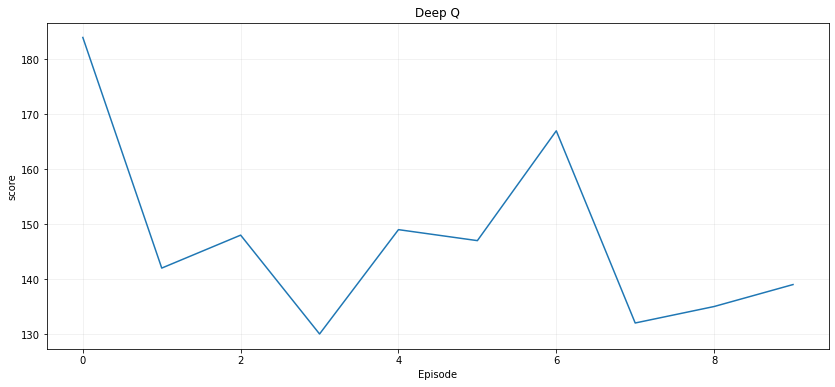

In [83]:
fig = plt.figure(figsize=(14,6))
plt.plot(scores.history['episode_reward'])
plt.ylabel('score')
plt.xlabel('Episode')
plt.title('Deep Q')
plt.grid(alpha=0.2)

In [145]:
test_score = dqn.test(env, nb_episodes=1000, visualize=False)

Testing for 1000 episodes ...
Episode 1: reward: 223.000, steps: 223
Episode 2: reward: 439.000, steps: 439
Episode 3: reward: 377.000, steps: 377
Episode 4: reward: 454.000, steps: 454
Episode 5: reward: 304.000, steps: 304
Episode 6: reward: 491.000, steps: 491
Episode 7: reward: 245.000, steps: 245
Episode 8: reward: 373.000, steps: 373
Episode 9: reward: 398.000, steps: 398
Episode 10: reward: 341.000, steps: 341
Episode 11: reward: 388.000, steps: 388
Episode 12: reward: 211.000, steps: 211
Episode 13: reward: 443.000, steps: 443
Episode 14: reward: 400.000, steps: 400
Episode 15: reward: 500.000, steps: 500
Episode 16: reward: 250.000, steps: 250
Episode 17: reward: 500.000, steps: 500
Episode 18: reward: 292.000, steps: 292
Episode 19: reward: 219.000, steps: 219
Episode 20: reward: 336.000, steps: 336
Episode 21: reward: 500.000, steps: 500
Episode 22: reward: 500.000, steps: 500
Episode 23: reward: 255.000, steps: 255
Episode 24: reward: 270.000, steps: 270
Episode 25: reward:

# Q learning


**Q-learning** is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations.   

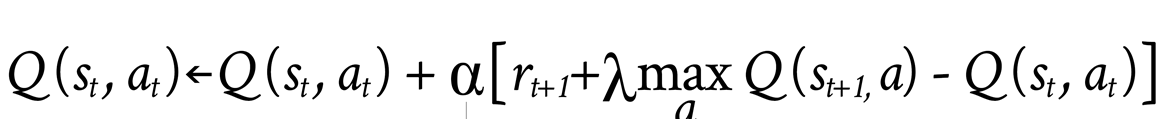

For any finite Markov decision process (FMDP), Q-learning finds an optimal policy in the sense of maximizing the expected value of the total reward over any and all successive steps, starting from the current state.

Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy. "Q" refers to the function that the algorithm computes – the expected rewards for an action taken in a given state.

2
Episode: 0
Time Average: 1.501321792602539e-06
Mean Reward: 0.021


C:\Users\MANUDW~1\AppData\Local\Temp/ipykernel_27612/4195193077.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Time Average: 0.0009550027847290039
Mean Reward: 36.082
Episode: 2000
Time Average: 0.001654996395111084
Mean Reward: 65.113
Time Average: 0.002335001230239868
Mean Reward: 94.016
Episode: 4000
Time Average: 0.002784999370574951
Mean Reward: 113.897
Time Average: 0.0030325026512145995
Mean Reward: 120.19
Training completed over 5000 episodes


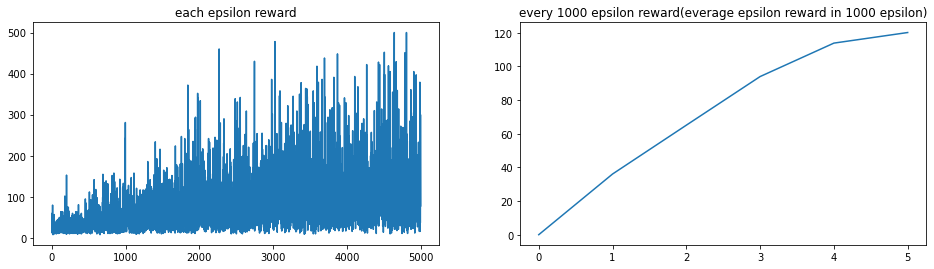

In [63]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations

import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")
print(env.action_space.n)


LEARNING_RATE = 0.3

DISCOUNT = 0.95
EPISODES = 5000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 0.2

epsilon_decay_value = 0.99995

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
#q_table = np.zeros([flatdim(env.observation_space), env.action_space.n])
# q_table.shape

reward_list = []
epReward_list = []
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

for episode in range(EPISODES + 1): #go through the episodes
    t0 = time.time() #set the initial time
    state= env.reset()
    #print(state)
    state_size = len(state)
    discrete_state = get_discrete_state(env.reset()) #get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 #reward starts as 0 for each episode

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) #do a random ation

        new_state, reward, done, _ = env.step(action) #step action to get new states, reward, and the "done" status.

        episode_reward += reward #add the reward

        new_discrete_state = get_discrete_state(new_state)

        # if episode % 2000 == 0: #render
        #     env.render()

        if not done: #update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: #epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() #episode has finished
    episode_total = t1 - t0 #episode total time
    total = total + episode_total

    total_reward += episode_reward #episode total reward
    reward_list.append(episode_reward)
    prior_reward = episode_reward
    
    if episode % 1000 == 0: #every 1000 episodes print the average time and the average reward
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        epReward_list.append(mean_reward)
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

plt.rcParams["figure.figsize"] = (16,9)
plt.subplot(2,2,1)
plt.plot(range(len(reward_list)),reward_list)
plt.title("each epsilon reward")
plt.subplot(2,2,2)
plt.plot(range(len(epReward_list)),epReward_list)
plt.title("every 1000 epsilon reward(everage epsilon reward in 1000 epsilon)")
print(f"Training completed over {EPISODES} episodes")

In [64]:
len(df['Episode'])

305

In [146]:
polyf = np.polyfit(range(len(df['Episode'])), test_score.history['episode_reward'][0:len(df['Episode'])], deg=1)
polyparams= np.poly1d(polyf)


In [147]:
from collections import deque
mean_rewards = []
cumScore = deque(maxlen=100)
for i in range(len(df['Episode'])):
    cumScore.append(test_score.history['episode_reward'][i])
#     if len(cumScore)==100:
    mean_rewards.append(np.mean(cumScore))

In [148]:
cumScore_acl = deque(maxlen=100)
mean_rewards_acl = []
score_acl = df['Reward'].to_numpy()
for i in range(len(df['Episode'])):
    cumScore_acl.append(score_acl[i])
#     if len(cumScore)==100:
    mean_rewards_acl.append(np.mean(cumScore_acl))

In [149]:
polyf_acl = np.polyfit(df['Episode'], df['Reward'], deg=1)
polyparams_acl= np.poly1d(polyf_acl)

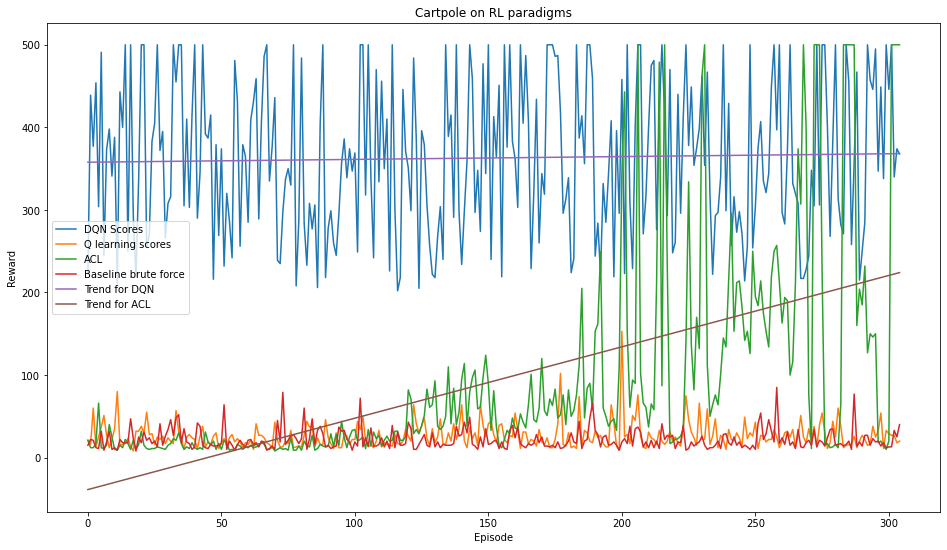

In [150]:
plt.plot(range(len(df['Episode'])), test_score.history['episode_reward'][0:len(df['Episode'])], label="DQN Scores")
plt.plot(range(len(df['Episode'])),reward_list[0:len(df['Episode'])], label="Q learning scores")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Cartpole on RL paradigms')
plt.plot(df['Episode'], df['Reward'], label= "ACL")
plt.plot(range(len(df['Episode'])), score_list[0:305], label="Baseline brute force")
plt.plot(range(len(df['Episode'])), polyparams(range(len(df['Episode']))), label="Trend for DQN")
plt.plot(range(len(df['Episode'])), polyparams_acl(range(len(df['Episode']))), label="Trend for ACL")
# plt.plot(mean_rewards)
# plt.plot(mean_rewards_acl, label="acl")
plt.legend()

# Reloading Agent from Memory

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

# Automatic Curriculum Learning 

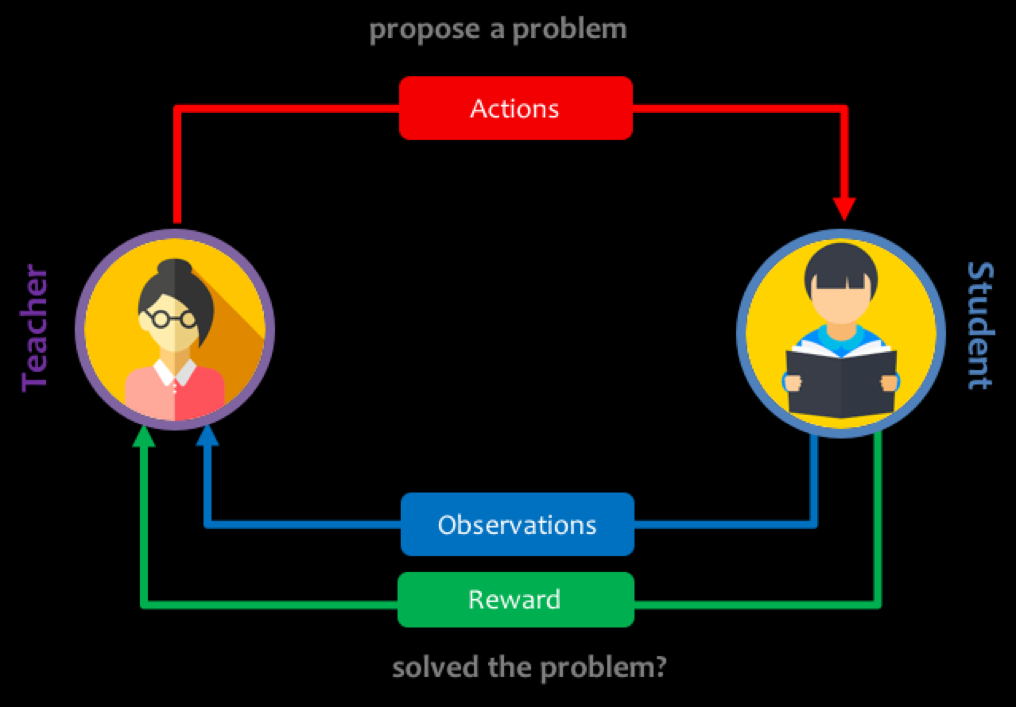


1. Student network: receives a task, and is expected to interact in the environment and learn how to solve it.

2. Teacher network: proposes tasks by observing the progress signal of the student and sampling new tasks that maximise this signal.

### **STUDENT**

The student can be any classical Deep Reinforcement Learning agent, as from its point of view, it is only expected to solve tasks provided to it. It will be trained end-to-end, using the extrinsic reward function of the task being tackled.

### **TEACHER**

The teacher should be able to follow the student progress, and propose tasks in a sequence which overall should lead to the student solving complex tasks it couldn’t before. It effectively needs to explore the space of tasks effectively, as depending on the expertise of the student the same task can be valuable or useless.

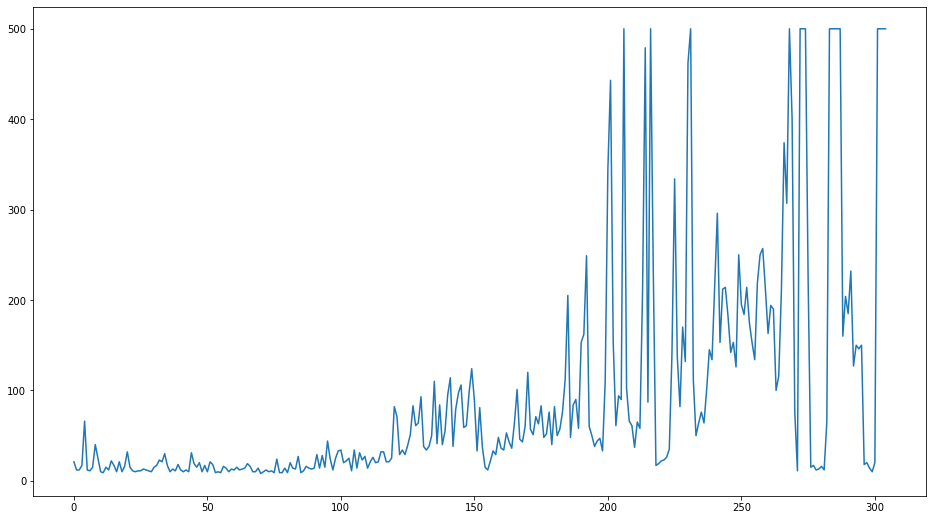

In [39]:
import pandas as pd
df = pd.read_csv("EpisodeRewards_CartPole.csv")
plt.plot(df['Episode'], df['Reward'])

In [ ]:
#Fix dependecies if any

In [ ]:
!pip install pygame

In [ ]:
import numpy as np
import time
import random
import matplotlib as plt
import gym
import pygame
import os
from collections import deque
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM


STUDENT_LR = 0.001
TEACHER_LR = 0.001
TEACHER_PRECISION = 0.99
IMPROVEMENT_WEIGHT = 0.001
RANDOM_SEED = 6
TOTAL_EPISODES = 1000
TEACHER_OUTPUT_SIZE = 1
WIN_REWARD = -110

env = gym.make('CartPole-v1')

env.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

def one_hot_encoder(index, size):
    return tf.one_hot(indices=index, depth=size).numpy()

def make_student(state_shape, action_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=state_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(action_shape, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=STUDENT_LR), metrics=['accuracy'])
    return model


def make_teacher(state_shape, output_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=state_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(output_shape, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=TEACHER_LR), metrics=['accuracy'])
    return model

def CL_teacher(observation, nextObservation, teacherAgent, reward, done):
    obsvReshape = observation.reshape([1, observation.shape[0]])
    nextObsvReshape = nextObservation.reshape([1, nextObservation.shape[0]])
    
    currActionQuality = np.array(teacherAgent.predict(obsvReshape))[0]
    nextActionQuality = np.array(teacherAgent.predict(nextObsvReshape))[0]
    
    targetQuality = reward + (1-done)*TEACHER_PRECISION*nextActionQuality
    improvement = targetQuality-currActionQuality
    teacherAgent.fit(obsvReshape, np.vstack([targetQuality]), verbose=0)
    
    return improvement

def student_action(observation, studentAgent, env):
    
    obsvReshape = observation.reshape([1, observation.shape[0]])
    probAction = studentAgent.predict(obsvReshape).flatten()
    action = np.random.choice(env.action_space.n, 1, p=probAction)[0]
    oneHotAction = tf.one_hot(indices=action, depth=env.action_space.n).numpy()
    
    return action, probAction, oneHotAction
    
    
studentAgent = make_student(env.observation_space.shape, env.action_space.n)
teacherAgent = make_teacher(env.observation_space.shape, TEACHER_OUTPUT_SIZE)
cumEpisodeRewards = deque(maxlen=100)
total_episode_rewards = []

for episode in range(TOTAL_EPISODES):
    episodeReward = 0
    observation = env.reset()
    done = False
    
    while not done:
        # env.render()
        action, probAction, oneHotAction = student_action(observation, studentAgent, env)
        nextObservation, reward, done, _ = env.step(action)
        improvement = CL_teacher(observation, nextObservation, teacherAgent, reward, done)
        studentTarget = probAction + IMPROVEMENT_WEIGHT * (oneHotAction-probAction) * improvement
        studentAgent.fit(observation.reshape([1, observation.shape[0]]), np.vstack([studentTarget]), verbose=0)
        observation = nextObservation
        episodeReward += reward
        if done:
            print(f'Episode Reward={episodeReward} at episode {episode}')
            cumEpisodeRewards.append(episodeReward)
            total_episode_rewards.append(episodeReward)
            mean_score = np.mean(cumEpisodeRewards)
            
            if mean_score >= WIN_REWARD and episode >= 100:
                print(f'Total episodes: {episode} \n Solved after {episode-100} episodes!')
                break
                
env.close()
                
# if __name__ == '__main__':
#     main()       